In [1]:
#https://huggingface.co/openai/clip-vit-large-patch14
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

In [2]:
ENDPOINT = "openai/clip-vit-large-patch14"
model = CLIPModel.from_pretrained(ENDPOINT)
processor = CLIPProcessor.from_pretrained(ENDPOINT)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [3]:
image = Image.open("../ImagesFolder/bayern_bvb.PNG")

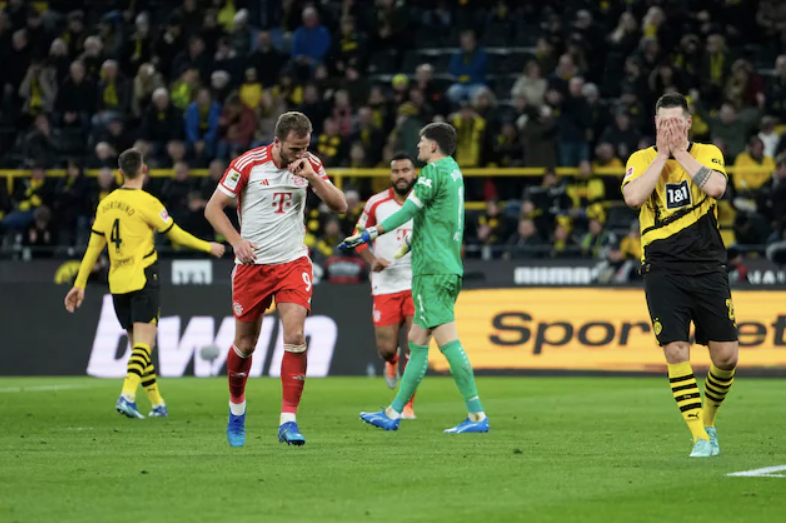

In [4]:
image

In [25]:
texts = ["a photo of a footballer", "a photo of a dog", "a photo of a cat"]
inputs = processor(text=["a photo of a footballer", "a photo of a dog", "a photo of a cat"], 
                   images=image, 
                   return_tensors="pt", 
                   padding=True)

In [8]:
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])

In [10]:
outputs = model(**inputs)

In [11]:
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[16.1878,  9.9690,  7.5626]], grad_fn=<TBackward0>), logits_per_text=tensor([[16.1878],
        [ 9.9690],
        [ 7.5626]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 0.0020, -0.0038,  0.0479,  ...,  0.0143,  0.0046,  0.0051],
        [ 0.0091, -0.0039,  0.0203,  ...,  0.0310,  0.0025,  0.0109],
        [-0.0031,  0.0028,  0.0291,  ...,  0.0227,  0.0088,  0.0132]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-2.1002e-03, -6.0713e-03, -1.8861e-03, -7.9158e-03, -2.7209e-02,
          2.0560e-04, -2.2865e-02,  1.2864e-02,  3.4092e-02, -2.5626e-02,
         -2.6463e-02, -2.2738e-02, -4.6111e-03,  8.0807e-03, -1.4035e-02,
         -3.9446e-03,  6.5809e-02,  1.8971e-02,  2.2859e-02,  5.8677e-03,
         -3.1292e-02,  3.3736e-02,  7.1520e-04,  2.8970e-02,  3.9220e-02,
         -1.8457e-02, -9.7880e-03,  2.3248e-02, -2.8141e-02,  2.3667e-02,
         -1.8611e-02, -2.9890e-03, -1.0151e-01,  3.7600e-02,  5.8946e-03,
          2.816

In [12]:
logits_per_image = outputs.logits_per_image # this is the image-text similarity score

In [13]:
logits_per_image

tensor([[16.1878,  9.9690,  7.5626]], grad_fn=<TBackward0>)

In [17]:
# we can take the softmax to get the label probabilities
probs = logits_per_image.softmax(dim=1)

In [18]:
probs

tensor([[9.9783e-01, 1.9874e-03, 1.7913e-04]], grad_fn=<SoftmaxBackward0>)

In [23]:
probs.squeeze().argmax().item()

0

In [28]:
for idx, t in enumerate(texts):
    print(f"{t} : {probs.squeeze()[idx] * 100: .2f}%")

a photo of a footballer :  99.78%
a photo of a dog :  0.20%
a photo of a cat :  0.02%
